In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.size']=16

#  1

To show no rotation, show vorticity=0:

$$\nabla \times \bf{v}=0$$

Only 2D, z-components go away and since symmetric, theta derivatives =0

$$\frac{\partial (r u_{\theta})}{\partial r}=0$$

$$\int \frac{\partial (r u_{\theta})}{\partial r}= \int 0 $$

$$ r u_{\theta} = constant=C $$

$$u_{\theta} = \frac{C}{r} $$

In [3]:
N = 50
x_start,x_end = -2.0,2.0
y_start,y_end = -1.0,1.0
x=numpy.linspace(x_start,x_end,N)
y=numpy.linspace(y_start,y_end,N)
X,Y=numpy.meshgrid(x,y)


In [4]:
gamma=5.0
x_vortex,y_vortex=0.0,0.0

str_sink=-1.0
x_sink,y_sink=0.0,0.0

In [5]:
def vel_vortex(strength,xv,yv,X,Y):
    u=+strength/(2*numpy.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v=-strength/(2*numpy.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u,v

def stream_vortex(strength,xv,yv,X,Y):
    psi = strength/(4*numpy.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    return psi

def vel_sink(strength,xs,ys,X,Y):
    u=strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v=strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    return u,v

def stream_sink(strength,xs,ys,X,Y):
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys),(X-xs))
    return psi

In [6]:
u_vortex,v_vortex= vel_vortex(gamma,x_vortex,y_vortex,X,Y)
u_sink,v_sink=vel_sink(str_sink,x_sink,y_sink,X,Y)
psi_vortex=stream_vortex(gamma,x_vortex,y_vortex,X,Y)
psi_sink=stream_sink(str_sink,x_sink,y_sink,X,Y)

In [7]:
u=u_vortex#+u_sink
v=v_vortex#+v_sink
psi=psi_vortex#+psi_sink

In [8]:
U_mag = numpy.sqrt(u**2+v**2)
U_mag

array([[ 0.35588127,  0.36784175,  0.38051422, ...,  0.38051422,
         0.36784175,  0.35588127],
       [ 0.35876173,  0.37102516,  0.38404131, ...,  0.38404131,
         0.37102516,  0.35876173],
       [ 0.36158885,  0.37415479,  0.38751516, ...,  0.38751516,
         0.37415479,  0.36158885],
       ..., 
       [ 0.36158885,  0.37415479,  0.38751516, ...,  0.38751516,
         0.37415479,  0.36158885],
       [ 0.35876173,  0.37102516,  0.38404131, ...,  0.38404131,
         0.37102516,  0.35876173],
       [ 0.35588127,  0.36784175,  0.38051422, ...,  0.38051422,
         0.36784175,  0.35588127]])

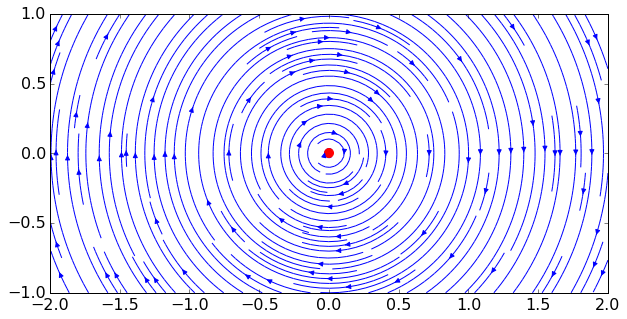

In [9]:
size =10
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u,v,density=2)
pyplot.scatter(x_vortex,y_vortex,color='r',s=80,marker='o');
#pyplot.contourf(X,Y,U_mag,linewidths=2,levels=numpy.linspace(0,1,300));
#pyplot.plot(U_mag,X);

In [10]:
v[N/2,N/2:]

/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


array([-15.59718442,  -6.32318287,  -3.86068921,  -2.77107337,
        -2.15961015,  -1.76875287,  -1.49751401,  -1.29832279,
        -1.14586057,  -1.02542043,  -0.92787783,  -0.84727265,
        -0.7795474 ,  -0.72184433,  -0.67209264,  -0.62875516,
        -0.59066684,  -0.55692864,  -0.5268357 ,  -0.4998276 ,
        -0.47545321,  -0.45334523,  -0.43320164,  -0.41477179,  -0.39784593])

/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


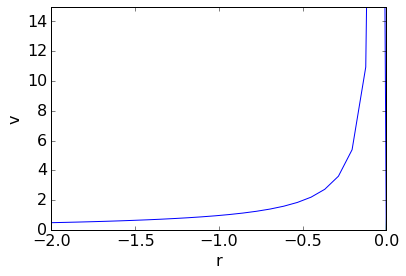

In [22]:
#line (nearly along) x-axis, vs values of v-component velocity
#wow = R*numpy.ones_like(x)
pyplot.plot(x,v[(N)/2,:])
#pyplot.plot(x, 1/x, color = 'g', marker='o')
pyplot.xlim(-2.0,0.0)
pyplot.ylim(0,15)
pyplot.xlabel('r')
pyplot.ylabel('v');

# 2a

Find stagnation points:

Start with the stream function for a vortex:

$$\psi = u_{inf} r ( 1- \frac{R^{2}}{r^{2}}) sin\theta - \frac {\Gamma}{2 \pi} ln r$$

$$v_{r} = u_{\infty} cos\theta (1 - \frac {R^{2}}{r^{2}})$$

$$v_{\theta} = -u_{\infty} sin\theta (1+ \frac {R^{2}}{r^{2}}) + \frac {\Gamma}{2 \pi r}$$

At the surface of the cylinder, r = R, $v_{r} = 0$ and

$$v_{\theta} = -2 u_{\infty} sin \theta + \frac {\Gamma}{2 \pi R}$$

Set this equal to zero to find the stagnation points:

$$v_{\theta} = 0$$

$$2 u_{\infty} sin \theta = \frac {\Gamma}{2 \pi r}$$

$$\theta_{stagnation} = sin^{-1} (\frac {\Gamma}{4 \pi R u_{\infty}})$$

In [12]:
kappa =1.0
x_doublet,y_doublet=0.0,0.0
u_inf=1.0
gamma = 6

In [13]:
def vel_doublet(strength,xd,yd,X,Y):
    u=-strength/(2*numpy.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = -strength/(2*numpy.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    return u,v

def stream_doublet(strength,xd,yd,X,Y):
    psi = -strength/(2*numpy.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    return psi

In [14]:
u_doublet,v_doublet = vel_doublet(kappa,x_doublet,y_doublet,X,Y)
psi_doublet=stream_doublet(kappa,x_doublet,y_doublet,X,Y)
u_fs = u_inf*numpy.ones((N,N),dtype=float)
psi_fs = u_inf*Y

u_vortex,v_vortex= vel_vortex(gamma,x_vortex,y_vortex,X,Y)
psi_vortex=stream_vortex(gamma,x_vortex,y_vortex,X,Y)

In [15]:
u = u_fs + u_doublet + u_vortex
v=v_doublet+v_vortex
psi=psi_doublet+psi_vortex+psi_fs
R = numpy.sqrt(kappa/(2*numpy.pi*u_inf))

In [16]:
theta_stag1 = numpy.pi + numpy.arcsin(gamma/(4*numpy.pi*R*u_inf));
theta_stag2 = 2*numpy.pi - numpy.arcsin(gamma/(4*numpy.pi*R*u_inf));
x_stag1 = R*numpy.cos(theta_stag1);
y_stag1 = R*numpy.sin(theta_stag1);
x_stag2 = R*numpy.cos(theta_stag2);
y_stag2 = R*numpy.sin(theta_stag2);
print(x_stag1,y_stag1)
print(x_stag2,y_stag2)

nan nan
nan nan


/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in arcsin
  if __name__ == '__main__':
/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app


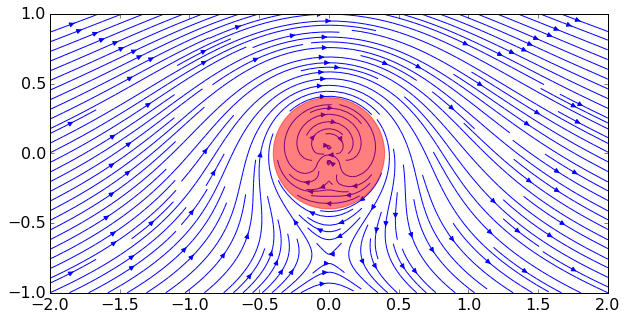

In [17]:
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u,v,density=2)
circle = pyplot.Circle((0,0),radius=R,color='r',alpha=0.5)
pyplot.gca().add_patch(circle)
pyplot.scatter([x_stag1,x_stag2],[y_stag1,y_stag2], color='g',s=80,marker='o')

# 2b
When the circulation gets larger, the stagnation point moves to a location below the cylinder (no longer on the surface of the cylinder)

# 2c

Forces on the cylinder:
$$ F = D \hat {i} + L \hat {j} = \int -p\ \hat{n} dA$$

$$D = -\int_{0}^{2\pi} p \ cos\theta\ R\ d\theta$$
$$L = -\int_{0}^{2\pi} p\ sin\theta\ R\ d\theta$$

# 2d

Bernoulli's:

$$ p_{\infty} + \frac{1}{2} \rho u_{\infty}^{2} = p + \frac{1}{2} \rho U^{2}$$

$v_{\theta}$ at the surface of the cylinder can be expressed as:

$$v_{\theta} = -2 u_{\infty}\ (sin\ \theta - sin\ \theta_{stag})$$

plug in for U in Bernoulli's eqn:

$$p = p_{\infty} + \frac {1}{2} \rho U_{\infty}^{2} [1 - 4(sin\ \theta - sin\ \theta_{stag})]$$

# 2e

Drag will = 0 because of symmetry around y-axis. This is known as D'Alembert's paradox because we know that in reality, drag would exist. 

Lift can be found by plugging in the p found above and integrating to get:

$$ L = 4\pi \rho U_{\infty}^{2} R sin\ \theta_{stag}$$
or
$$ L = -\rho U_{\infty} \Gamma\ $$

^This is the Kutta-Joukowski thm, they proved it a long time ago. Used to calculate lift around airfoils.